In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

In [2]:
embed_counts = []
embed_path = '../../data/raw/embeds/'
for f_name in os.listdir(embed_path):
    embed_name = f_name.split('.')[0]
    embed_count = pd.read_csv(embed_path + f_name).shape[0]
    embed_counts.append([embed_name, embed_count])

embed_counts = pd.DataFrame(embed_counts, columns=['name', 'count'])
embed_counts

,name,count
0,fMRI_text_hyper_align,1205
1,norms_sensorimotor,36854
2,EEG_text,3355
3,LexVec_CommonCrawl,87638
4,fastText_CommonCrawl,88989
5,spherical_text_Wikipedia,59014
6,GloVe_CommonCrawl,88443
7,EEG_speech,1591
8,THINGS,1562
9,fMRI_speech_hyper_align,579


In [3]:
embed_counts['count'] = np.log10(embed_counts['count']) 
embed_counts = embed_counts.sort_values(by='count', ascending=False) 

embed_counts

,name,count
4,fastText_CommonCrawl,4.949336
6,GloVe_CommonCrawl,4.946663
3,LexVec_CommonCrawl,4.942692
15,fastText_Wiki_News,4.912381
10,CBOW_GoogleNews,4.899164
16,fastTextSub_OpenSub,4.860578
21,GloVe_Wikipedia,4.838503
5,spherical_text_Wikipedia,4.770955
12,morphoNLM,4.703360
20,GloVe_Twitter,4.686779


In [4]:
with open('../../data/raw/embed_to_dtype.json', 'r') as f:
    embed_to_dtype = json.load(f)

embed_counts['dtype'] = embed_counts['name'].map(embed_to_dtype)
embed_counts['name'] = embed_counts['name'].str.replace('_', ' ')
embed_counts

,name,count,dtype
4,fastText CommonCrawl,4.949336,text
6,GloVe CommonCrawl,4.946663,text
3,LexVec CommonCrawl,4.942692,text
15,fastText Wiki News,4.912381,text
10,CBOW GoogleNews,4.899164,text
16,fastTextSub OpenSub,4.860578,text
21,GloVe Wikipedia,4.838503,text
5,spherical text Wikipedia,4.770955,text
12,morphoNLM,4.703360,text
20,GloVe Twitter,4.686779,text


In [5]:
meta = pd.read_csv('../../data/raw/psychNorms_metadata.csv', index_col=0)
meta

,description,citation,category,associated_embed,type,n_ratings
norm,,,,,,
Freq_HAL,Log10 version of frequency norms based on the ...,"Lund, K. and C. Burgess (1996). ""Producing hig...",frequency,NaN,continuous,79671
Freq_KF,Log10 version of frequency norms based on the ...,"Kučera, H. and W. N. Francis (1967). Computati...",frequency,NaN,continuous,35230
Freq_SUBTLEXUS,Log10 version of frequency norms based on the ...,"Brysbaert, M. and B. New (2009). ""Moving beyon...",frequency,NaN,continuous,57214
Freq_SUBTLEXUK,Log10 version of the frequency norms based on ...,"Van Heuven, W. J., et al. (2014). ""SUBTLEX-UK:...",frequency,NaN,continuous,61843
Freq_Blog,Log10 version of the frequency norms based on ...,"Gimenes, M. and B. New (2016). ""Worldlex: Twit...",frequency,NaN,continuous,70646
...,...,...,...,...,...,...
familiarity_vanarsdall,Ratings from 1 (highly unfamiliar) to 7 (highl...,"@article{vanarsdall2022analyzing,\n title={An...",familiarity,NaN,continuous,1200
imageability_vanarsdall,Ratings from 1 (low imagery) to 7 (high imagery),"@article{vanarsdall2022analyzing,\n title={An...",imageability,NaN,continuous,1200
familiarity_fear,Ratings from 1 (extremely infrequent) to 7 (ex...,"@article{fear1997ratings,\n title={Ratings fo...",familiarity,NaN,continuous,703


In [7]:
norms = pd.read_csv('../../data/raw/psychNorms.zip', compression='zip', index_col=0, low_memory=False)
meta = pd.read_csv('../../data/raw/psychNorms_metadata.csv', index_col=0)


norm_counts = norms.count().sort_values(ascending=False).reset_index()
norm_counts.columns = ['name', 'count']
norm_counts['category'] = norm_counts['name'].map(meta['category']).str.replace('_', ' ').str.title()

# Log transforming the counts
norm_counts['count'] = np.log10(norm_counts['count'])
norm_counts

,name,count,category
0,Freq_HAL,4.901300,Frequency
1,CD_Blog,4.849088,Semantic Diversity
2,Freq_Blog,4.849088,Frequency
3,Freq_Twitter,4.849088,Frequency
4,Freq_News,4.849088,Frequency
...,...,...,...
287,imageability_citron,2.477121,Imageability
288,aoa_citron,2.477121,Age Of Acquisition
289,familiarity_citron,2.477121,Familiarity
290,arousal_citron,2.477121,Arousal


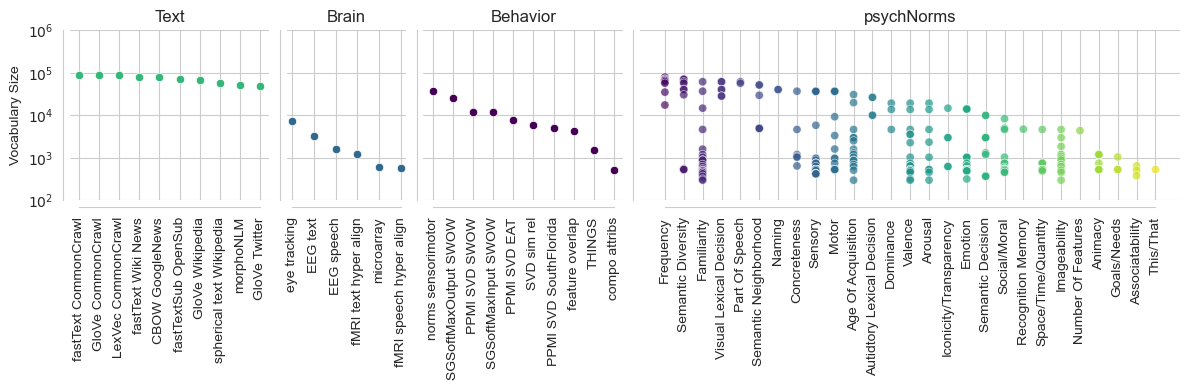

In [10]:
with open('../../data/raw/dtype_to_embed.json', 'r') as f:
    dtype_to_embed = json.load(f)

width_ratios = [len(value) for value in dtype_to_embed.values()] + [len(norm_counts['category'].unique())]

# Colors 
cmap = plt.get_cmap('viridis', 4)
embed_type_to_color = {
    'brain': cmap(1),
    'behavior': cmap(0),
    'text': cmap(2)
}

fig, axs = plt.subplots(1, 4, figsize=(12, 4), width_ratios=width_ratios, sharey=True)

# Text embed counts
sns.scatterplot(
    embed_counts.query('dtype == "text"'), x='name', y='count', color=embed_type_to_color['text'],  ax=axs[0]
)
ymin, ymax = 2, 6
axs[0].set(
    ylim=(ymin, ymax), yticks=range(ymin, ymax+1), yticklabels=[f'$10^{i}$' for i in range(ymin, ymax+1)], 
    ylabel='Vocabulary Size', title='Text'
)

# Brain embed counts
sns.scatterplot(
    embed_counts.query('dtype == "brain"'), x='name', y='count', color=embed_type_to_color['brain'], ax=axs[1]
)
axs[1].set(title='Brain')

# Behavior embed counts
sns.scatterplot(
    embed_counts.query('dtype == "behavior"'), x='name', y='count', color=embed_type_to_color['behavior'], ax=axs[2]
)
axs[2].set(title='Behavior')

# Norms
sns.scatterplot(
    norm_counts, x='category', y='count', hue='category', palette='viridis', legend=False, alpha=0.7,
    ax=axs[3]
)
axs[3].set(title='psychNorms', yticks=range(ymin, ymax+1), ylabel='PAD')

for ax in axs:
    # rotate x-axis labels
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.set(xlabel='' )

# Adds ylabel to last plot by freeing it from the shared y-axis
axs[3].set(ylabel='Vocabulary Size')


sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.savefig('../../figures/vocab_sizes.png', dpi=300)